In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [2]:
font = {
    "family":"SimHei",
    'size':20
}
plt.rc('font',**font)

In [4]:
df = pd.read_csv('data.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# 查看数据是否有空值
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
# 查看数据描述
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
# 把列改成中文
df.columns = ['用户ID','性别','年龄','年收入','支出']
df.head()

,用户ID,性别,年龄,年收入,支出
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 查看数据分布

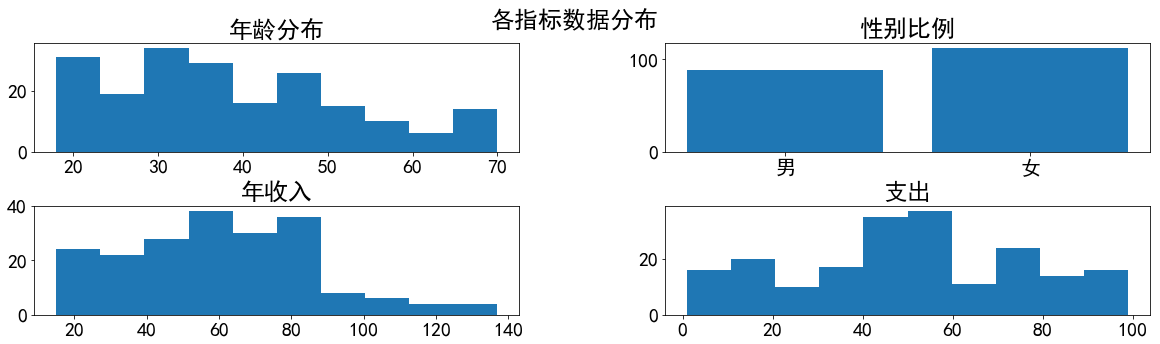

In [13]:
fig = plt.figure(figsize=(20,5))
fig.suptitle('各指标数据分布')

# 画第一个图
ax1 = fig.add_subplot(221)
# 查看年龄分布
ax1.hist(df['年龄'])
ax1.title.set_text('年龄分布')

# 第二个查看性别比例
ax2 = fig.add_subplot(222)
height = [(df['性别']=='Male').sum(), (df['性别']=='Female').sum()]
ax2.bar(['男','女'],height=height)
ax2.title.set_text('性别比例')

# 第三个查看年收入
ax1 = fig.add_subplot(223)
# 查看年收入分布
ax1.hist(df['年收入'])
ax1.title.set_text('年收入')


#  查看支出
ax1 = fig.add_subplot(224)
# 查看支出分布
ax1.hist(df['支出'])
ax1.title.set_text('支出')

fig.subplots_adjust(wspace=0.3,hspace=0.5)
plt.show()

## 年龄与年收入之间的关系

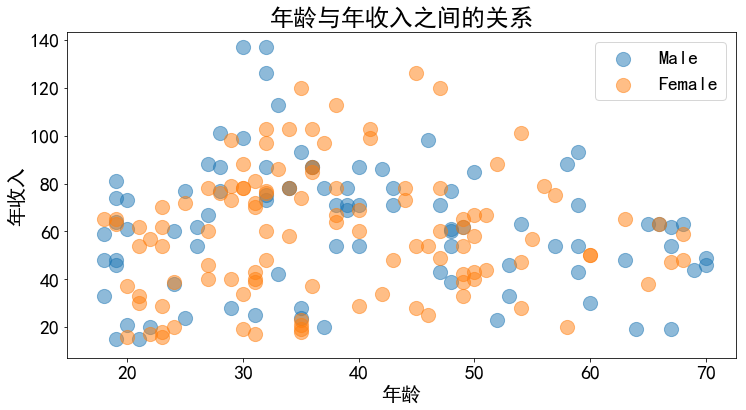

In [14]:
plt.figure(1,figsize=(12,6))
for gender in ['Male','Female']:
    plt.scatter(x='年龄',y='年收入'
                ,data=df[df['性别']==gender]
                ,s=200,alpha=0.5,label=gender)
plt.xlabel('年龄')
plt.ylabel('年收入')
plt.title('年龄与年收入之间的关系')
plt.legend()
plt.show()

## 年龄与支出之间的关系

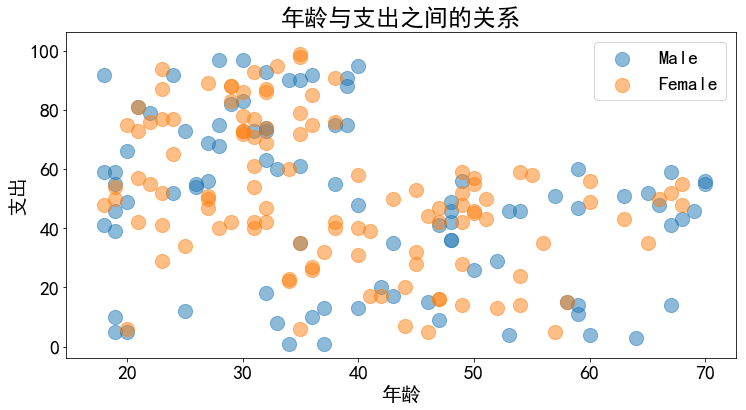

In [15]:
plt.figure(1,figsize=(12,6))
for gender in ['Male','Female']:
    plt.scatter(x='年龄',y='支出'
                ,data=df[df['性别']==gender]
                ,s=200,alpha=0.5,label=gender)
plt.xlabel('年龄')
plt.ylabel('支出')
plt.title('年龄与支出之间的关系')
plt.legend()
plt.show()

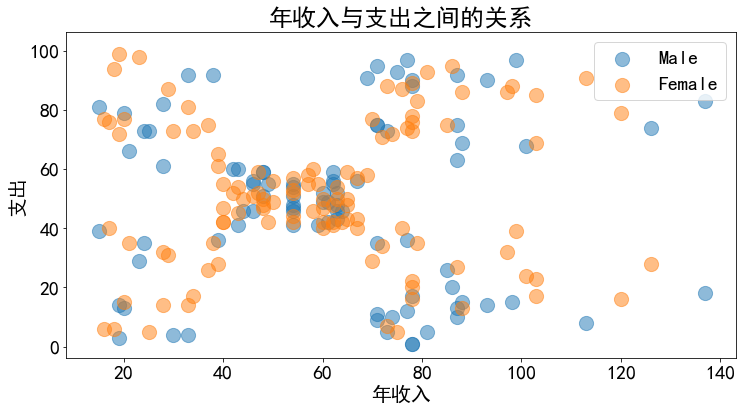

In [16]:
## 年收入与支出之间的关系

plt.figure(1,figsize=(12,6))
for gender in ['Male','Female']:
    plt.scatter(x='年收入',y='支出'
                ,data=df[df['性别']==gender]
                ,s=200,alpha=0.5,label=gender)
plt.xlabel('年收入')
plt.ylabel('支出')
plt.title('年收入与支出之间的关系')
plt.legend()
plt.show()

## 使用kmeans聚类进行分析

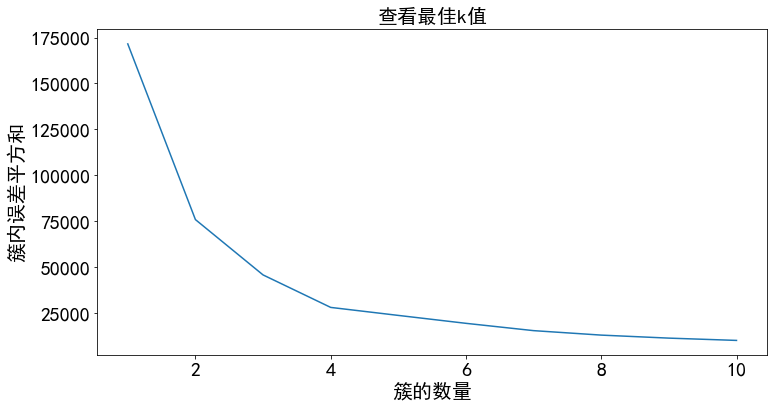

In [17]:
## 寻找最佳K值
x1 = df[['年龄','支出']].values
from sklearn.cluster import KMeans
inertia = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(x1)
    inertia.append(km.inertia_) # 簇内误差平方和
plt.figure(1,figsize=(12,6))
plt.plot(range(1,11), inertia)
plt.title('查看最佳k值',fontsize=20)
plt.xlabel('簇的数量')
plt.ylabel('簇内误差平方和')
plt.show()

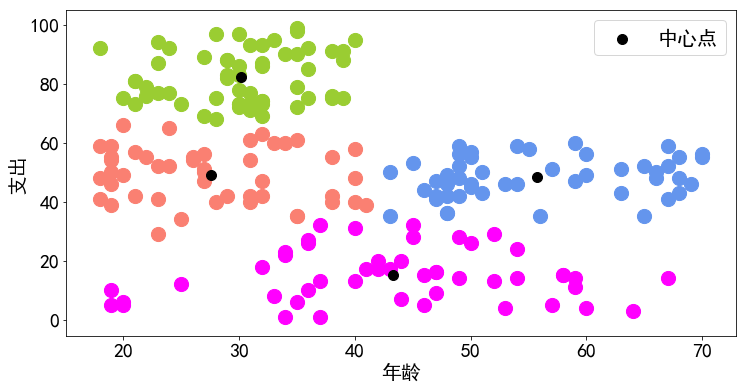

In [19]:
## 经过上图的观察，我们把k值取为4
km = KMeans(n_clusters=4)
y_means = km.fit_predict(x1)

plt.figure(1, figsize=(12,6))
plt.scatter(x1[y_means==0,0], x1[y_means==0,1], s= 200,c='salmon')
plt.scatter(x1[y_means==1,0], x1[y_means==1,1], s= 200,c='yellowgreen')
plt.scatter(x1[y_means==2,0], x1[y_means==2,1], s= 200,c='cornflowerblue')
plt.scatter(x1[y_means==3,0], x1[y_means==3,1], s= 200,c='magenta')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=100,c='black',label='中心点')

plt.ylabel('支出')
plt.xlabel('年龄')
plt.legend()
plt.show()

## 根据年收入和消费进行分析


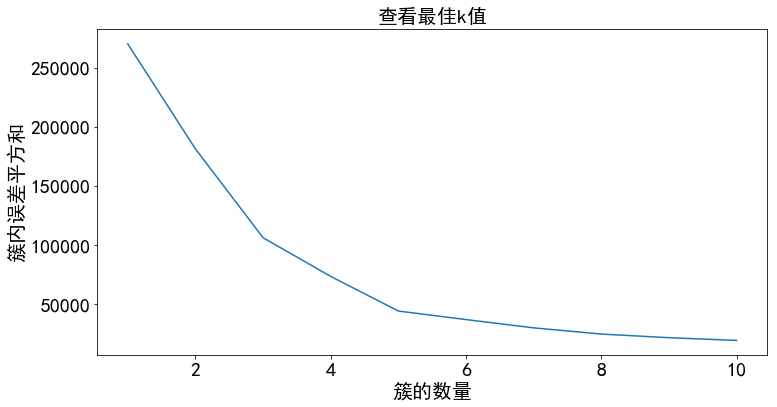

In [20]:
x2 = df[['年收入','支出']].values
from sklearn.cluster import KMeans
inertia = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(x2)
    inertia.append(km.inertia_) # 簇内误差平方和
plt.figure(1,figsize=(12,6))
plt.plot(range(1,11), inertia)
plt.title('查看最佳k值',fontsize=20)
plt.xlabel('簇的数量')
plt.ylabel('簇内误差平方和')
plt.show()

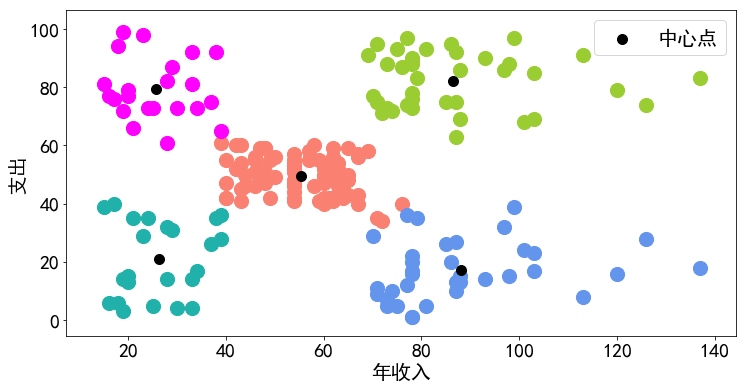

In [23]:
## 经过上图的观察，我们把k值取为5
km = KMeans(n_clusters=5)
y_means = km.fit_predict(x2)

plt.figure(1, figsize=(12,6))
plt.scatter(x2[y_means==0,0], x2[y_means==0,1], s= 200,c='salmon')
plt.scatter(x2[y_means==1,0], x2[y_means==1,1], s= 200,c='yellowgreen')
plt.scatter(x2[y_means==2,0], x2[y_means==2,1], s= 200,c='cornflowerblue')
plt.scatter(x2[y_means==3,0], x2[y_means==3,1], s= 200,c='magenta')
plt.scatter(x2[y_means==4,0], x2[y_means==4,1], s= 200,c='LightSeaGreen')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=100,c='black',label='中心点')

plt.ylabel('支出')
plt.xlabel('年收入')
plt.legend()
plt.show()